In [26]:
import sys
import numpy as np
import galois
import progressbar

In [3]:
with open("C:\\Users\\Philip\\Documents\\programmieren\\python\\bwinf40-2\\zara-zackig\\beispiele\\stapel5.txt") as f:
    n_cards, n_opening_cards, n_bits = map(int, f.readline().split())
    card_strings = []
    while line := f.readline():
        card_strings.append(line.strip())
cards_bool = [[bit == "1" for bit in card] for card in card_strings]
cards = np.array(cards_bool).astype(int)


In [4]:
GF2 = galois.GF(2)
cards_gf2 = GF2(cards.T)
null_space = cards_gf2.null_space()
null_space_np = np.array(null_space)
null_space.shape

(136, 200)

In [5]:
np.sum(null_space_np, axis=1)

array([43, 36, 31, 37, 27, 28, 33, 34, 39, 32, 42, 32, 30, 35, 30, 33, 36,
       38, 39, 35, 31, 32, 33, 32, 35, 32, 35, 40, 31, 29, 38, 33, 35, 38,
       34, 35, 30, 38, 33, 32, 29, 42, 33, 32, 28, 30, 30, 32, 35, 38, 40,
       39, 21, 37, 33, 38, 31, 32, 31, 38, 33, 32, 33, 33, 35, 32, 31, 25,
       33, 36, 33, 36, 32, 36, 36, 35, 30, 36, 35, 29, 26, 34, 30, 30, 33,
       29, 28, 35, 33, 40, 34, 37, 33, 36, 33, 35, 33, 36, 33, 32, 35, 35,
       37, 43, 35, 31, 34, 29, 35, 33, 35, 30, 38, 30, 37, 41, 30, 28, 36,
       36, 31, 24, 33, 39, 28, 36, 29, 30, 24, 37, 33, 37, 36, 37, 26, 37],
      dtype=uint32)

In [6]:
np.linalg.matrix_rank(null_space)

136

In [7]:
null_space.T.sum(axis=1).reshape(1, -1).null_space().shape

(199, 200)

In [35]:
l = []
for i in progressbar.progressbar(range(100)):
    l.append([])
    for k in range(50, 150):
        l[i].append(np.linalg.matrix_rank(GF2.Random((100, k))))

  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (1 of 100) |                        | Elapsed Time: 0:00:01 ETA:   0:02:54
  2% (2 of 100) |                        | Elapsed Time: 0:00:03 ETA:   0:02:51
  3% (3 of 100) |                        | Elapsed Time: 0:00:05 ETA:   0:02:50
  4% (4 of 100) |                        | Elapsed Time: 0:00:07 ETA:   0:02:50
  5% (5 of 100) |#                       | Elapsed Time: 0:00:08 ETA:   0:02:47
  6% (6 of 100) |#                       | Elapsed Time: 0:00:10 ETA:   0:02:44
  7% (7 of 100) |#                       | Elapsed Time: 0:00:12 ETA:   0:02:42
  8% (8 of 100) |#                       | Elapsed Time: 0:00:14 ETA:   0:02:40
  9% (9 of 100) |##                      | Elapsed Time: 0:00:15 ETA:   0:02:39
 10% (10 of 100) |##                     | Elapsed Time: 0:00:17 ETA:   0:02:37
 11% (11 of 100) |##                     | Elapsed Time: 0:00:19 ETA:   0:02:35
 12% (12 of 100) |##                    

In [38]:
np.average(l, axis=0)

array([ 50.  ,  51.  ,  52.  ,  53.  ,  54.  ,  55.  ,  56.  ,  57.  ,
        58.  ,  59.  ,  60.  ,  61.  ,  62.  ,  63.  ,  64.  ,  65.  ,
        66.  ,  67.  ,  68.  ,  69.  ,  70.  ,  71.  ,  72.  ,  73.  ,
        74.  ,  75.  ,  76.  ,  77.  ,  78.  ,  79.  ,  80.  ,  81.  ,
        82.  ,  83.  ,  84.  ,  85.  ,  86.  ,  87.  ,  88.  ,  89.  ,
        90.  ,  91.  ,  91.98,  93.  ,  93.98,  94.97,  95.94,  96.89,
        97.67,  98.62,  99.23,  99.53,  99.76,  99.9 ,  99.96,  99.97,
        99.97,  99.98, 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  ])

In [44]:
def pr_fullrank(rows, column):
    return np.prod(1. - 2.**(np.arange(1, columns) - 1 - rows))

In [48]:
pr_fullrank(128, 100)

0.999999998137355

In [51]:
import time
import matplotlib.pyplot as plt

In [62]:
times = []
for i in progressbar.progressbar(range(10, 1000, 5)):
    start_time = time.time()
    _ = GF2.Random((i, i)).null_space()
    times.append(time.time() - start_time)

  0% (0 of 198) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (11 of 198) |#                      | Elapsed Time: 0:00:00 ETA:  00:00:00
  8% (16 of 198) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (21 of 198) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 11% (23 of 198) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 13% (26 of 198) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 14% (28 of 198) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 15% (31 of 198) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:03
 16% (33 of 198) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (36 of 198) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:03
 19% (38 of 198) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:03
 20% (40 of 198) |####                   | Elapsed Time: 0:00:01 ETA:   0:00:03
 20% (41 of 198) |####                  

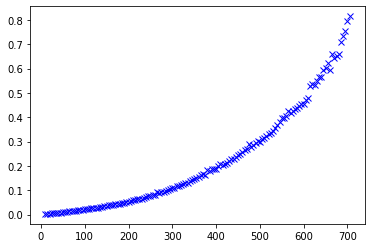

In [67]:
plt.plot(range(10, 1000, 5)[:140], times[:140], "bx")
